# Project Title : Indian Startup Ecosystem Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

## Load Data

In [2]:
data18 = pd.read_csv('startup_funding2018.csv')
data19 = pd.read_csv('startup_funding2019.csv')
data20 = pd.read_csv('startup_funding2020.csv')
data21 = pd.read_csv('startup_funding2021.csv')

## Exploratory Data Analysis

### Data Overview

In [3]:
data18.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [4]:
data18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


### Questions


#### 1. Trend in Investment Rate over the years?
#### 2. What Sector received the highest Investment?
#### 3. Which Sectors thrived in the pandemic era?
#### 4. Which stage had the highest number of startups?
#### 5. What are the top 5 cities with the highest investment?
#### 6. The city with the highest number of startups and the total investment receieved by the city 
#### 7. Average investment amount for a seed stage investment over the period in India
#### 8. Top 5 sectors in Mumbai per investment
#### 9. Top 5 sectors in Bangalore per number of startups


### Hypothesis

##### Null Hypothesis:  Tech Companies are more likely to access investment funds
##### Alternate Hypothesis: Tech Companies are less likely to access investment funds.

### Issues with the dataset

2018 Dataset: 

-- Names of columns vary between 2018 dataset and other datasets.<br> Therefore, there will be need to rename and match the columns.
   
* Location -> HeadQuarter 
* Industry -> Sector
* Company Name -> Company/Brand,
* New amount-> Amount, 
* Round/Series -> Stage

-- Data type Issue:

-- Amount column is not in the appropriate data type. <br> There are values with Dollar and Rupee symbols. For consistency, these values should be changed to one currency.
<br> The cells with the <rupee> symbols have to be converted to dollars using the 2018 conversion rate.
<br> Commas and some unwanted signs e.g —,  in the Amount column.
    
-- Missng Values Issue:
<br> With the exception of Company/Brand Columns, all the other columns had missing values

    

## Data Cleaning

#### The stages for data cleaning:

#### Duplicated Values
#### Custom based rule checking
#### Missing values
#### Datatypes

###### CLEANING 2018 DATASET

In [5]:
data18.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


###### DUPLICATED VALUES

In [6]:
data18.duplicated().sum()

1

In [7]:
#lets show the dulicated rows to investigate before dropping:
data18[data18['Company Name']=='TheCollegeFever']

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."


In [73]:
#Removing duplicated values

data18.drop_duplicates(inplace =True)
data18.reset_index(drop =True, inplace =True)

In [74]:
data18

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($),Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",250000,2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,584000.00,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,949000.00,2018
3,PayMe India,"Financial Services, FinTech",Angel,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2000000,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,—,2018
...,...,...,...,...,...,...,...
520,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif...",225000000,2018
521,Happyeasygo Group,"Tourism, Travel",Series A,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.,—,2018
522,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...,7500,2018
523,Droni Tech,Information Technology,Seed,"Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...,511000.00,2018


###### Amount Column Inspection.
    
###### The main issues: 
* Varying currency values; Rupees and Dollars.
* Inappropriate Datatype due to symbols

 
###### Assumption:
* Upon visual inspection, values without currency symbols are assumed to be in dollars

###### Solution:
* Convert the currency(Rupees) into Dollars (USD)

In [10]:
#create a temp column to help help ith conversion INR to USD
data18['INR Amt'] = data18.Amount.str.rsplit('₹', n = 2).str[1]
data18['INR Amt'] = data18['INR Amt'].apply(lambda x: str(x).replace(',', ''))
data18['INR Amt'] = data18['INR Amt'].apply(float).fillna(0)

#create a new column USD Amt and convert the INR Amt to USD
 
# The average rupee to dollar converion rate  for the year 2018 as obtained from online sources is 0.0146
data18['USD Amt'] = data18['INR Amt']*0.0146

In [75]:
data18.head()

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($),Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",250000,2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,584000.00,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,949000.00,2018
3,PayMe India,"Financial Services, FinTech",Angel,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2000000,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,—,2018


In [77]:
#Replace 0 values with np.nan
data18['USD Amt'] = data18['USD Amt'].replace(0, np.nan)

#Fill nan values in USD amount with values in Amount
data18['USD Amt'] = data18['USD Amt'].fillna(data18['Amount'])

# drop Amount column and INR columns
data18.drop(['Amount','INR Amt'], axis = 1, inplace = True)

#Rename USD Amt to Amount($)
data18.rename(columns = {'USD Amt': 'Amount($)'}, inplace = True)


KeyError: 'USD Amt'

In [76]:
data18.head()

,Company/Brand,Sector,Stage,HeadQuarter,What it does,Amount($),Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",250000,2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,584000.00,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,949000.00,2018
3,PayMe India,"Financial Services, FinTech",Angel,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2000000,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,—,2018


In [78]:
#create a Year column for data18, data19, data20 and data21 to help in the merge
data18['Year'] = 2018
data19['Year'] = 2019
data20['Year'] = 2020
data21['Year'] = 2021

 ###### MERGING 2019-2021 DATAFRAMES

In [79]:
data = pd.concat([data19, data20, data21])

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2353 entries, 0 to 1208
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  2353 non-null   object
 1   Founded        2111 non-null   object
 2   HeadQuarter    2239 non-null   object
 3   Sector         2335 non-null   object
 4   What it does   2353 non-null   object
 5   Founders       2334 non-null   object
 6   Investor       2253 non-null   object
 7   Amount($)      2347 non-null   object
 8   Stage          1415 non-null   object
 9   Year           2353 non-null   int64 
 10  Unnamed: 9     2 non-null      object
dtypes: int64(1), object(10)
memory usage: 220.6+ KB


In [81]:
data.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year,Unnamed: 9
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN,2019,NaN
1,Ruangguru,2014.00,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C,2019,NaN
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,2019,NaN
3,HomeLane,2014.00,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D,2019,NaN
4,Nu Genes,2004.00,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN,2019,NaN


###### MERGING DATA AND DATA18

Rename Columns, Drop Columns and Merge

<br> Columns were renamed for proper matching during the concatention.
<br> The columns which were not relevant to the initial questions asked were dropped.

In [82]:
data.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage', 'Year', 'Unnamed: 9'],
      dtype='object')

In [83]:
data18.columns

Index(['Company/Brand', 'Sector', 'Stage', 'HeadQuarter', 'What it does',
       'Amount($)', 'Year'],
      dtype='object')

In [84]:
# Rename Columns
data18.rename(columns = {'Location': 'HeadQuarter', 'Industry': 'Sector', 'Company Name': 'Company/Brand' ,'Amount': 'Amount($)', 'Round/Series':'Stage',  'About Company': 'What it does',}, inplace = True)

In [85]:
# Drop unwanted columns
data.drop(['Founded','Founders','Unnamed: 9', 'Investor'], axis = 1, inplace = True)

In [86]:
data = pd.concat([data, data18])

In [87]:
data.head()

,Company/Brand,HeadQuarter,Sector,What it does,Amount($),Stage,Year
0,Bombay Shaving,NaN,Ecommerce,Provides a range of male grooming products,"$6,300,000",NaN,2019
1,Ruangguru,Mumbai,Edtech,A learning platform that provides topic-based ...,"$150,000,000",Series C,2019
2,Eduisfun,Mumbai,Edtech,It aims to make learning fun via games.,"$28,000,000",Fresh funding,2019
3,HomeLane,Chennai,Interior design,Provides interior designing solutions,"$30,000,000",Series D,2019
4,Nu Genes,Telangana,AgriTech,"It is a seed company engaged in production, pr...","$6,000,000",NaN,2019


###### FURTHER INSPECTION ON THE AMOUNT COLUMN

* Replace symbols and other string values
* Change datatype

In [88]:
#Removing symbols and string values:
data['Amount($)'] = data['Amount($)'].apply(lambda x : str(x).replace('$',''))
data['Amount($)'] = data['Amount($)'].apply(lambda x : str(x).replace(',',''))
data['Amount($)'] = data['Amount($)'].apply(lambda x : str(x).replace('undisclosed','0'))
data['Amount($)'] = data['Amount($)'].apply(lambda x : str(x).replace('Undisclosed','0'))
data['Amount($)'] = data['Amount($)'].apply(lambda x : str(x).replace('nan','0'))
data['Amount($)'] = data['Amount($)'].apply(lambda x : str(x).replace('Undislosed','0'))
data['Amount($)'] = data['Amount($)'].apply(lambda x : str(x).replace('Series C','0'))
data['Amount($)'] = data['Amount($)'].apply(lambda x : str(x).replace('Seed','0'))
data['Amount($)'] = data['Amount($)'].apply(lambda x : str(x).replace('Upsparks','0'))
data['Amount($)'] = data['Amount($)'].apply(lambda x : str(x).replace('ah! Ventures','0'))
data['Amount($)'] = data['Amount($)'].apply(lambda x : str(x).replace('ITO Angel Network LetsVenture','0'))
data['Amount($)'] = data['Amount($)'].apply(lambda x : str(x).replace('Pre-series A','0'))
data['Amount($)'] = data['Amount($)'].apply(lambda x : str(x).replace('JITO Angel Network LetsVenture','0'))
data['Amount($)'] = data['Amount($)'].apply(lambda x : str(x).replace('Undiclsosed','0'))
data['Amount($)'] = data['Amount($)'].apply(lambda x : str(x).replace('J0','0'))
data['Amount($)'] = data['Amount($)'].apply(lambda x : str(x).replace('800000000 to 850000000','875000000'))
data['Amount($)'] = data['Amount($)'].apply(lambda x : str(x).replace('887000 23000000','11943500'))
data['Amount($)'] = data['Amount($)'].apply(lambda x : str(x).replace("''","0"))
data['Amount($)'] = data['Amount($)'].apply(lambda x : str(x).replace('—','0'))
data['Amount($)']= data['Amount($)'].replace(r'^\s*$', np.nan, regex=True)

#changing the datatype of the Amount column to float
data["Amount($)"] = data['Amount($)'].apply(lambda x:float(x))

In [89]:
data.head()

,Company/Brand,HeadQuarter,Sector,What it does,Amount($),Stage,Year
0,Bombay Shaving,NaN,Ecommerce,Provides a range of male grooming products,6300000.00,NaN,2019
1,Ruangguru,Mumbai,Edtech,A learning platform that provides topic-based ...,150000000.00,Series C,2019
2,Eduisfun,Mumbai,Edtech,It aims to make learning fun via games.,28000000.00,Fresh funding,2019
3,HomeLane,Chennai,Interior design,Provides interior designing solutions,30000000.00,Series D,2019
4,Nu Genes,Telangana,AgriTech,"It is a seed company engaged in production, pr...",6000000.00,NaN,2019


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2878 entries, 0 to 524
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  2878 non-null   object 
 1   HeadQuarter    2764 non-null   object 
 2   Sector         2860 non-null   object 
 3   What it does   2878 non-null   object 
 4   Amount($)      2876 non-null   float64
 5   Stage          1940 non-null   object 
 6   Year           2878 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 179.9+ KB


###### MISSING VALUES IN THE OVERALL DATASET

In [91]:
data.isna().sum()

Company/Brand      0
HeadQuarter      114
Sector            18
What it does       0
Amount($)          2
Stage            938
Year               0
dtype: int64

In [92]:
data.isna().sum()/len(data)*100

Company/Brand    0.00
HeadQuarter      3.96
Sector           0.63
What it does     0.00
Amount($)        0.07
Stage           32.59
Year             0.00
dtype: float64

#### DEALING WITH MISSING VALUES

######  INSPECTION INTO THE HEADQUARTER COLUMN

Appraoch

* Replaced Missing values with the mode of the column

In [93]:
data['HeadQuarter'].value_counts()

Bangalore                        764
Mumbai                           380
Gurugram                         239
New Delhi                        181
Bangalore, Karnataka, India      101
                                ... 
Samsitpur                          1
West Bengal                        1
Nagpur                             1
Powai                              1
Lucknow, Uttar Pradesh, India      1
Name: HeadQuarter, Length: 172, dtype: int64

In [94]:
 #Replacing the missing location by the mode of the data.
    
data['HeadQuarter'] = data.HeadQuarter.apply(lambda x:str(x).replace('nan','Bangalore'))


In [95]:
data['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Chennai', 'Telangana', 'Pune', 'Noida',
       'Delhi', 'Ahmedabad', 'Gurugram', 'Haryana', 'Chandigarh',
       'Jaipur', 'New Delhi', 'Surat', 'Uttar pradesh', 'Hyderabad',
       'Rajasthan', 'Indore', 'Gurgaon', 'Belgaum', 'Andheri', 'Kolkata',
       'Tirunelveli, Tamilnadu', 'Thane', 'Singapore', 'Gujarat',
       'Kerala', 'Jodhpur', 'Jaipur, Rajastan',
       'Frisco, Texas, United States', 'California', 'Dhingsara, Haryana',
       'New York, United States', 'Patna',
       'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-de-France, France', 'Plano, Texas, United States',
       'Sydney', 'San Francisco Bay Area, Silicon Valley, West Coast',
       'Bangaldesh', 'London, England, United Kingdom',
       'Sydney, New South Wales, Australia', 'Milano, Lombardia, Italy',
       'Palmwoods, Queensland, Australia', 'France',
       'San Francisco Bay Area, West Coast, Wester

###### DEALING WITH MISSING VALUES IN THE AMOUNT COLUMN

Approach:

Replace the missing values with the mean of the values in the column

In [96]:
avg_amt = data['Amount($)'].mean()
data['Amount($)']=  data['Amount($)'].fillna(avg_amt)

In [97]:
data.isna().sum()

Company/Brand      0
HeadQuarter        0
Sector            18
What it does       0
Amount($)          0
Stage            938
Year               0
dtype: int64

###### DEALING WITH MISSING VALUES IN THE STAGE COLUMN

Approach
* Replace the missing values with another category called Unspecified because the mode value was less than the missing values in the column

In [98]:
data['Stage'].value_counts()

Seed             605
Series A         305
Pre-series A     211
Series B         134
Series C         114
                ... 
Series C, D        1
Seed+              1
Series F2          1
Series A+          1
Funding Round      1
Name: Stage, Length: 75, dtype: int64

In [99]:
data['Stage'] =data['Stage'].fillna('Unspecified')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2878 entries, 0 to 524
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  2878 non-null   object 
 1   HeadQuarter    2878 non-null   object 
 2   Sector         2860 non-null   object 
 3   What it does   2878 non-null   object 
 4   Amount($)      2878 non-null   float64
 5   Stage          2878 non-null   object 
 6   Year           2878 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 179.9+ KB


###### REPLACING THE ABNORMALIES IN THE STAGE COLUMN

Approach:
* It was observed that the mode value of the column = 'Seed' covered about 31% of the column and hence replacing all the null values with the mode value will cause the distribution in the column to be biased and skewed towards the right
* It came to our realization that the null values will be better off replaced with "unavailable" since that would not affect the whole column negatively
* It was also observed that there were monetary values in the column which did not take a significat percentage of the column hence they were replaced by the mode('Seed')


In [100]:
# Replacing the descrepancies with suitable names in the column
data['Stage'] = data['Stage'].apply(lambda x : str(x).replace('Pre series A','Pre-series A'))
data['Stage'] = data['Stage'].apply(lambda x : str(x).replace('Pre-Series A','Pre-series A'))
data['Stage'] = data['Stage'].apply(lambda x : str(x).replace('Pre-series A','Pre-series A'))
data['Stage'] = data['Stage'].apply(lambda x : str(x).replace('Seies A','Series A'))
data['Stage'] = data['Stage'].apply(lambda x : str(x).replace('Pre-Series B','Pre-series B'))
data['Stage'] = data['Stage'].apply(lambda x : str(x).replace('Pre-Series C','Pre-series C'))
data['Stage'] = data['Stage'].apply(lambda x : str(x).replace('Post series A','Post-series A'))
data['Stage'] = data['Stage'].apply(lambda x : str(x).replace('Pre Series A','Pre-series A'))
data['Stage'] = data['Stage'].apply(lambda x : str(x).replace('Pre series A1','Pre-series A'))
data['Stage'] = data['Stage'].apply(lambda x : str(x).replace('Pre series B','Pre-series A'))
data['Stage'] = data['Stage'].apply(lambda x : str(x).replace('Pre seed round','Pre-seed Round'))
data['Stage'] = data['Stage'].apply(lambda x : str(x).replace('Pre-Seed Round','Pre-seed Round'))
data['Stage'] = data['Stage'].apply(lambda x : str(x).replace('Seed Round','Seed'))
data['Stage'] = data['Stage'].apply(lambda x : str(x).replace('Pre Series A','Pre-Series A'))
data['Stage'] = data['Stage'].apply(lambda x : str(x).replace('Pre series C','Pre-series C'))
data['Stage'] = data['Stage'].apply(lambda x : str(x).replace('Venture - Series Unknown','Series A'))
data['Stage'] = data['Stage'].apply(lambda x : str(x).replace('https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593','Pre-Seed Round'))
# replacing the numeric values with the most recurring stage which is the Seed value                                                              
data['Stage'] = data['Stage'].apply(lambda x : str(x).replace('$1200000','Seed'))
data['Stage'] = data['Stage'].apply(lambda x : str(x).replace('$1000000','Seed'))
data['Stage'] = data['Stage'].apply(lambda x : str(x).replace('$300000','Seed'))
data['Stage'] = data['Stage'].apply(lambda x : str(x).replace('$6000000','Seed'))

# replacing the nan values with 'unavailable' since replacing them with the mode will cause the column to biased and disrupt the distribution 
# The number of missing values is too significant to just replace with the mode which is also substantial and will cause the distribution to be skewed towards the left                                                              
data['Stage'] = data['Stage'].apply(lambda x : str(x).replace('nan','unavailable')) 


In [101]:
Specified_Investment_Stages = data[data['Stage']!='Unspecified']['Stage'].value_counts()

###### DEALING WITH MISSING VALUES IN THE SECTOR COLUMN

Approach:

* Replace the missing values manually through visual inspection

In [103]:
data.iloc[41, data.columns.get_loc('Sector')] = 'Social Media'
data.iloc[49, data.columns.get_loc('Sector')] = 'HR'
data.iloc[52, data.columns.get_loc('Sector')] = 'B2B'
data.iloc[56, data.columns.get_loc('Sector')] = 'FinTech'
data.iloc[57, data.columns.get_loc('Sector')] = 'FinTech'
data.iloc[518, data.columns.get_loc('Sector')] = 'Ecommerce'
data.iloc[569, data.columns.get_loc('Sector')] = 'Ecommerce'
data.iloc[687, data.columns.get_loc('Sector')] = 'Staff and Recruiting'
data.iloc[699, data.columns.get_loc('Sector')] = 'Fashion'
data.iloc[707, data.columns.get_loc('Sector')] = 'Ecommerce'
data.iloc[732, data.columns.get_loc('Sector')] = 'Ecommerce'
data.iloc[746, data.columns.get_loc('Sector')] = 'Packaging services'
data.iloc[763, data.columns.get_loc('Sector')] = 'Food and Beverages'
data.iloc[809, data.columns.get_loc('Sector')] = 'Tech Company'
data.iloc[918, data.columns.get_loc('Sector')] = 'FinTech'
data.iloc[926, data.columns.get_loc('Sector')] = 'Real Estate'
data.iloc[1012, data.columns.get_loc('Sector')] = 'Tech Company'
data.iloc[1031, data.columns.get_loc('Sector')] = 'Tech Company'


In [104]:
data['Sector'].unique()

array(['Ecommerce', 'Edtech', 'Interior design', 'AgriTech', 'Technology',
       'SaaS', 'AI & Tech', 'E-commerce', 'E-commerce & AR', 'Fintech',
       'HR tech', 'Food tech', 'Health', 'Healthcare', 'Safety tech',
       'Pharmaceutical', 'Insurance technology', 'AI', 'Foodtech', 'Food',
       'IoT', 'E-marketplace', 'Robotics & AI', 'Logistics', 'Travel',
       'Manufacturing', 'Food & Nutrition', 'Social Media', 'E-Sports',
       'HR', 'Cosmetics', 'B2B', 'Jewellery', 'B2B Supply Chain', 'Games',
       'FinTech', 'Food & tech', 'Accomodation', 'Automotive tech',
       'Legal tech', 'Mutual Funds', 'Cybersecurity', 'Automobile',
       'Sports', 'Healthtech', 'Yoga & wellness', 'Virtual Banking',
       'Transportation', 'Transport & Rentals',
       'Marketing & Customer loyalty', 'Infratech', 'Hospitality',
       'Automobile & Technology', 'Banking', 'EdTech',
       'Hygiene management', 'Escrow', 'Networking platform',
       'Crowdsourcing', 'Food & Bevarages', 'HealthTe

###### REPLACING THE ABNORMALIES IN THE SECTOR COLUMN

In [105]:
data['Sector'] = data['Sector'].apply(lambda x : str(x).replace('SaaS\xa0\xa0startup','SaaS'))
data['Sector'] = data['Sector'].apply(lambda x : str(x).replace('Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients.','Healthcare'))
data['Sector'] = data['Sector'].apply(lambda x : str(x).replace("MoEVing is India's only Electric Mobility focused Technology Platform with a vision to accelerate EV adoption in India.",'Tech'))
data['Sector'] = data['Sector'].apply(lambda x : str(x).replace('Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience','Entertainment & Media'))
data['Sector'] = data['Sector'].apply(lambda x : str(x).replace('—',''))
data['Sector'] = data['Sector'].apply(lambda x : str(x).replace('Computer, Digital Marketing, Facilities Support Services, Graphic Design, Internet, Mobile Apps, Social Media Marketing, Web Development','IT'))
data['Sector'] = data['Sector'].apply(lambda x : str(x).replace('Android, Big Data, Blockchain, Cloud Computing, EdTech, Education, Information Technology, iOS, Training, Web Development','Tech'))
data['Sector'] = data['Sector'].apply(lambda x : str(x).replace('Big Data, Business Intelligence, Financial Services, FinTech, Personal Finance','FinTech'))
data['Sector'] = data['Sector'].apply(lambda x : str(x).replace('Commercial Real Estate, Coworking, Office Administration, Real Estate','Real Estate'))
data['Sector'] = data['Sector'].apply(lambda x : str(x).replace('Apps, Health Care, Internet, Mobile Apps, Personal Health','Healthcare'))
data['Sector'] = data['Sector'].apply(lambda x : str(x).replace('Advertising, Artificial Intelligence, Digital Media, iOS, Location Based Services, News, Video, Video on Demand, Video Streaming','Media'))
data['Sector'] = data['Sector'].apply(lambda x : str(x).replace('Broadcasting, Media and Entertainment, Music, Music Streaming, Video, Video Streaming','Media and Entertainment'))
data['Sector'] = data['Sector'].apply(lambda x : str(x).replace('Creative Agency, Crowdfunding, EdTech, Health Care, Internet, Medical, Non Profit, Personal Health','Health Care'))
data['Sector'] = data['Sector'].apply(lambda x : str(x).replace('Consumer Lending, Financial Services, FinTech, Insurance, Lending, Mobile Payments, Payments, Wealth Management','FinTech'))
data['Sector'] = data['Sector'].apply(lambda x : str(x).replace('Enterprise Resource Planning (ERP), Information Services, Information Technology, Real Estate','Information Technology'))
data['Sector'] = data['Sector'].apply(lambda x : str(x).replace('Analytics, Computer Vision, Enterprise Software, Machine Learning, Natural Language Processing, Speech Recognition','IT'))
data['Sector'] = data['Sector'].apply(lambda x : str(x).replace('Analytics, CRM, Loyalty Programs, Machine Learning, Marketing Automation, Retail Technology, SaaS, Small and Medium Businesses','SaaS'))
data['Sector'] = data['Sector'].apply(lambda x : str(x).replace('Basketball, Cricket, Cycling, eSports, Fitness, Golf, Health Care, Hockey, Sports, Swimming, Table Tennis, Volley Ball','Sports'))
data['Sector'] = data['Sector'].apply(lambda x : str(x).replace('Fitness, GreenTech, Internet of Things, Mobile Apps, Ride Sharing, Transportation','Internet of Things'))
data['Sector'] = data['Sector'].apply(lambda x : str(x).replace('Health Care, Health Diagnostics, Internet of Things, Life Science, Machine Learning, Medical, Medical Device','Health Care'))
data['Sector'] = data['Sector'].apply(lambda x : str(x).replace('Edtech','EdTech'))
data['Sector'] = data['Sector'].apply(lambda x : str(x).replace('Fintech','FinTech'))
data['Sector'] = data['Sector'].apply(lambda x : str(x).replace('Healthtech','HealthTech'))
data['Sector'] = data['Sector'].apply(lambda x : str(x).replace('Technology','Tech'))
data['Sector'] = data['Sector'].apply(lambda x : str(x).replace('SaaS platform','SaaS'))
data['Sector'] = data['Sector'].apply(lambda x : str(x).replace('SaaS startup','SaaS'))
data['Sector'] = data['Sector'].apply(lambda x : str(x).replace('AI startup','AI'))
data['Sector'] = data['Sector'].apply(lambda x : str(x).replace('Agritech','AgriTech'))
data['Sector'] = data['Sector'].apply(lambda x : str(x).replace('Insurtech','InsurTech'))
data['Sector'] = data['Sector'].apply(lambda x : str(x).replace('InsurTech','InsureTech'))
data['Sector'] = data['Sector'].apply(lambda x : str(x).replace('Tech','Tech Company'))
data['Sector'] = data['Sector'].apply(lambda x : str(x).replace('Tech Company company','Tech Company'))
data['Sector'] = data['Sector'].apply(lambda x : str(x).replace('Foodtech','FoodTech Company'))
data['Sector'] = data['Sector'].apply(lambda x : str(x).replace('Food tech','FoodTech Company'))

In [106]:
data.isna().sum()

Company/Brand    0
HeadQuarter      0
Sector           0
What it does     0
Amount($)        0
Stage            0
Year             0
dtype: int64

* The dataset has no missing data in any of the columns.

###### INSPECTION INTO THE YEAR COLUMN

Approach:

* Change datatype 

In [107]:
data['Year']= data['Year'].astype(str)


In [108]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2878 entries, 0 to 524
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  2878 non-null   object 
 1   HeadQuarter    2878 non-null   object 
 2   Sector         2878 non-null   object 
 3   What it does   2878 non-null   object 
 4   Amount($)      2878 non-null   float64
 5   Stage          2878 non-null   object 
 6   Year           2878 non-null   object 
dtypes: float64(1), object(6)
memory usage: 179.9+ KB



## Analysis

In [109]:
data.head()

,Company/Brand,HeadQuarter,Sector,What it does,Amount($),Stage,Year
0,Bombay Shaving,Bangalore,Ecommerce,Provides a range of male grooming products,6300000.00,Unspecified,2019
1,Ruangguru,Mumbai,EdTech Company,A learning platform that provides topic-based ...,150000000.00,Series C,2019
2,Eduisfun,Mumbai,EdTech Company,It aims to make learning fun via games.,28000000.00,Fresh funding,2019
3,HomeLane,Chennai,Interior design,Provides interior designing solutions,30000000.00,Series D,2019
4,Nu Genes,Telangana,AgriTech Company,"It is a seed company engaged in production, pr...",6000000.00,Unspecified,2019


In [110]:
Startup_data = data.to_csv('startup_data.csv')

### 1.Trend in Investment Rate over the years?

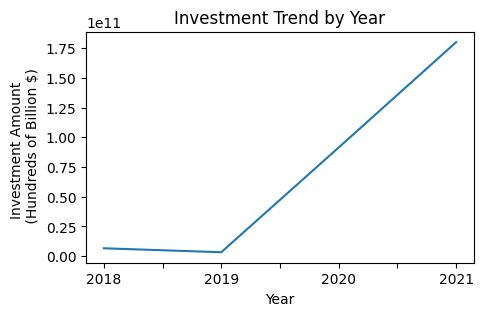

In [111]:
# Group by year and sum the investment amounts
investments_by_year = data.groupby('Year')['Amount($)'].sum()

# plot a line chart to visualize the trend over time
investments_by_year.plot(kind='line', figsize=(5, 3), title='Investment Trend by Year')
plt.ylabel('Investment Amount \n (Hundreds of Billion $)')
plt.xlabel('Year')

plt.show()

### Insights

The graph above gives an insight on the investment trends from 2018 - 2021.<br>

Between the 2018 to 2019, the sum of investment accessed by startups declined. Reasons are not clear. <br>

However, between 2019 through to 2021, sums of investment constantly increased as shown on the line plot. <br>
This can be attributed to the increased interest in newer and innovative ventures that would determine the future of 
economies through and beyond the pandemic.

### 2. What Sector received the highest Investment?

In [112]:
# group the data by sector and calculate the total investment amount for each sector
investments_by_sector = data.groupby('Sector')['Amount($)'].sum().sort_values(ascending=False).head(10)
pd.set_option('display.float_format', lambda x: f'{x:.2f}')
Top_10 =pd.DataFrame({'Sector': investments_by_sector.index, 'Amount': investments_by_sector.values})
Top_10

,Sector,Amount
0,FinTech Company,154751432909.60
1,Retail,70542380000.00
2,EdTech Company,5881552278.17
3,Tech Company,3423983900.00
4,E-commerce,2879052000.00
5,Multinational conglomerate company,2200000000.00
6,Automotive,2111941000.00
7,Financial Services,1800826500.00
8,Hospitality,1622903000.00
9,Insurance,1097650000.00


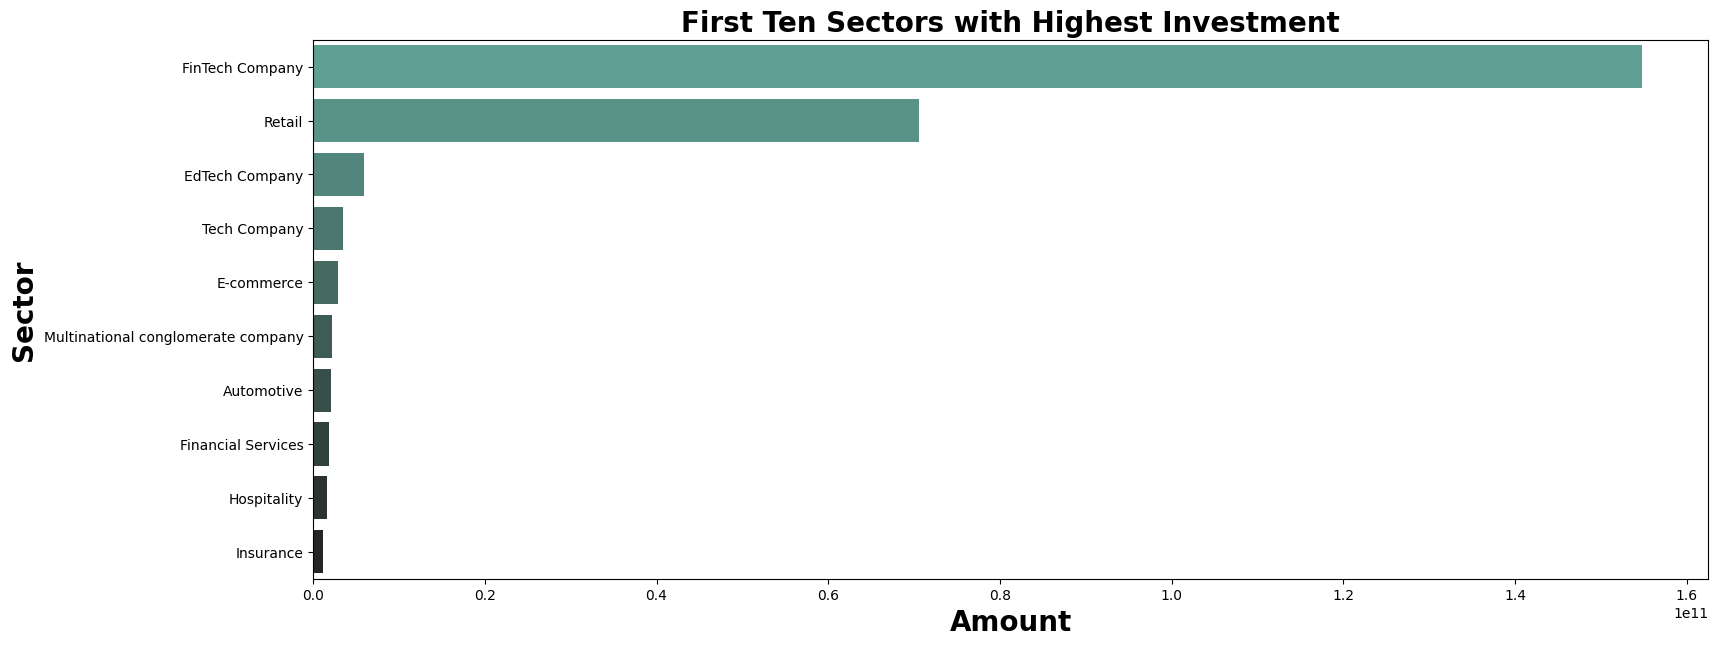

In [113]:
# plot a bar chart to visualize the first ten sectors with the highest investment
plt.figure(figsize=(18,7))
plt.title('First Ten Sectors with Highest Investment',fontsize =20, fontweight='bold')
plt.xlabel('Amount($)', fontsize=20, fontweight='bold')
plt.ylabel('Sector', fontsize=20, fontweight='bold')
sns.barplot(data=Top_10, y='Sector',x='Amount',  palette="dark:#5A9_r");

### Insights

The plot above aligns with the increased interest in tech related innovations.<br> It can be observed that tech-inclined startups received more investment funding in India.

### 3. Which Sectors thrived in the pandemic era?

In [114]:
Trend_data = data[(data.Year =='2019') | (data.Year =='2020')]  
Trend_data

,Company/Brand,HeadQuarter,Sector,What it does,Amount($),Stage,Year
0,Bombay Shaving,Bangalore,Ecommerce,Provides a range of male grooming products,6300000.00,Unspecified,2019
1,Ruangguru,Mumbai,EdTech Company,A learning platform that provides topic-based ...,150000000.00,Series C,2019
2,Eduisfun,Mumbai,EdTech Company,It aims to make learning fun via games.,28000000.00,Fresh funding,2019
3,HomeLane,Chennai,Interior design,Provides interior designing solutions,30000000.00,Series D,2019
4,Nu Genes,Telangana,AgriTech Company,"It is a seed company engaged in production, pr...",6000000.00,Unspecified,2019
...,...,...,...,...,...,...,...
1050,Leverage Edu,Delhi,EdTech Company,AI enabled marketplace that provides career gu...,1500000.00,Unspecified,2020
1051,EpiFi,Bangalore,FinTech Company,It offers customers with a single interface fo...,13200000.00,Seed,2020
1052,Purplle,Mumbai,Cosmetics,Online makeup and beauty products retailer,8000000.00,Unspecified,2020
1053,Shuttl,Delhi,Transport,App based bus aggregator serice,8043000.00,Series C,2020


In [115]:
Sector_high_investment = Trend_data.groupby('Sector')['Amount($)'].sum().sort_values(ascending= False).head(10)
pd.set_option('display.float_format', lambda x: f'{x:.2f}')
Top_10_trends = pd.DataFrame({'Sector': Sector_high_investment.index, 'Amount': Sector_high_investment.values})
Top_10_trends

,Sector,Amount
0,Retail,70239400000.00
1,EdTech Company,3844534730.00
2,Tech Company,3421983900.00
3,Multinational conglomerate company,2200000000.00
4,FinTech Company,2134948909.60
5,E-commerce,1549607000.00
6,Education,875546000.00
7,Hospitality,701030000.00
8,SaaS,686584442.23
9,Food Delivery,660000000.00


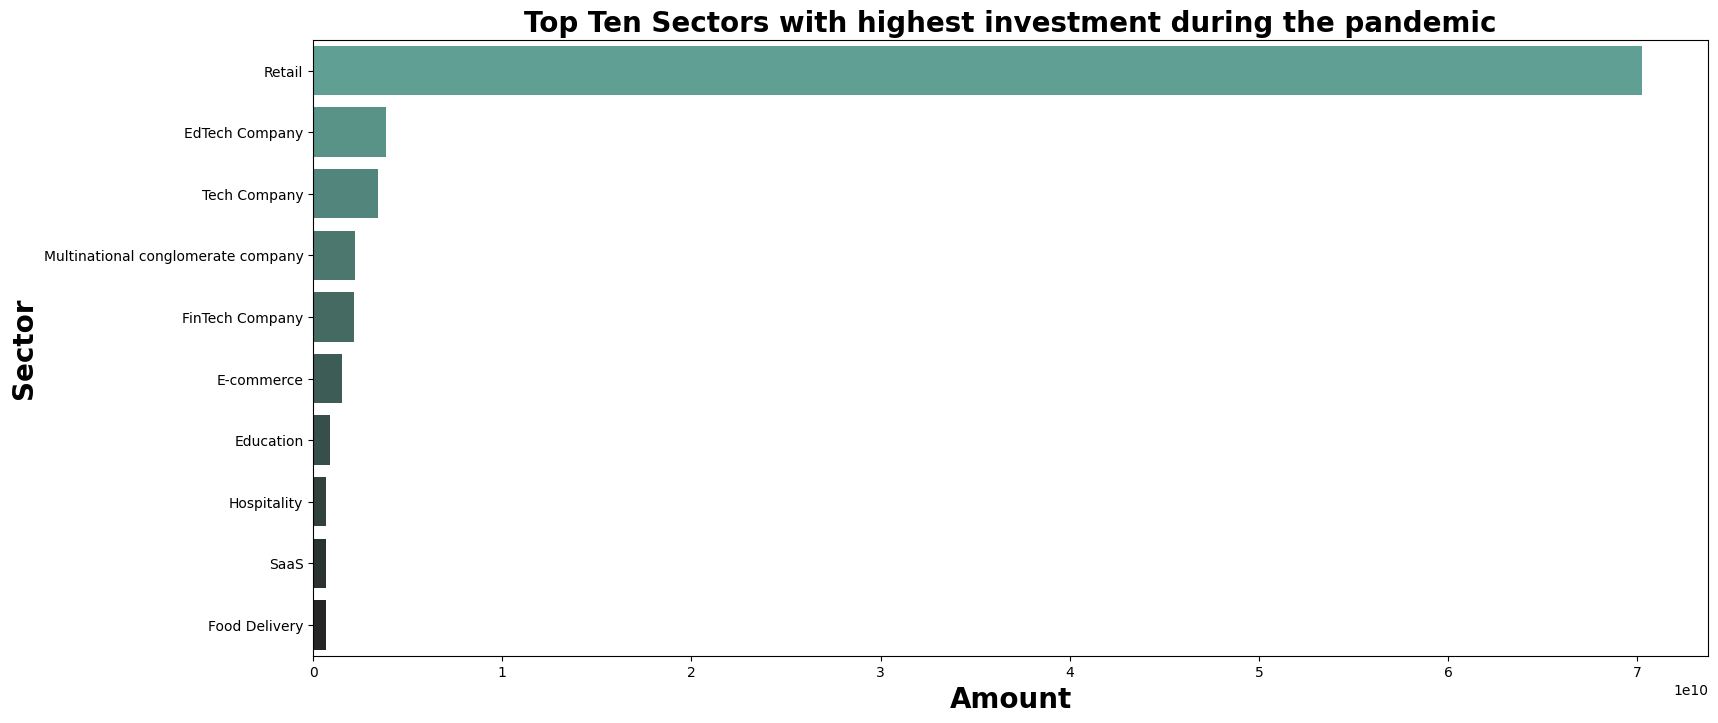

In [116]:
plt.figure(figsize=(18,8))
plt.title('Top Ten Sectors with highest investment during the pandemic',fontsize=20, fontweight='bold')
plt.xlabel('Amount ($)',fontsize =20, fontweight ='bold')
plt.ylabel('Sector',fontsize =20, fontweight ='bold')
sns.barplot(data=Top_10_trends, y='Sector',x='Amount',  palette="dark:#5A9_r"); 


### Insights

During the pandemic era, the following were observed:
* Startups in the retail industry received the most investment funding.<br> This can be atrributed to the surge in more retail outlets during the pandemic as opposed to wholesale joints.<br>People found retail outlets as covenient.

* EdTech activities increased with more educational facilities migrating online. 

* Overall, Tech-inclined innovation received more investment funding.


### 4.  Which Stage has the highest number of startups?

From the data, the funding stage could be classified into two broad categories; specified and unspecified. About half of the startups have an unspecified funding stage. The analysis below is with respect to those startups with a specified funding stage. 

In [117]:
Top_10_stages = Specified_Investment_Stages.head(10)
Top_10_stages = pd.DataFrame({'Stage': Top_10_stages.index, 'Number': Top_10_stages.values})
Top_10_stages

,Stage,Number
0,Seed,680
1,Series A,343
2,Pre-series A,287
3,Series B,134
4,Series C,114
5,Pre-seed,58
6,Series D,50
7,Debt,45
8,Angel,37
9,Series E,30


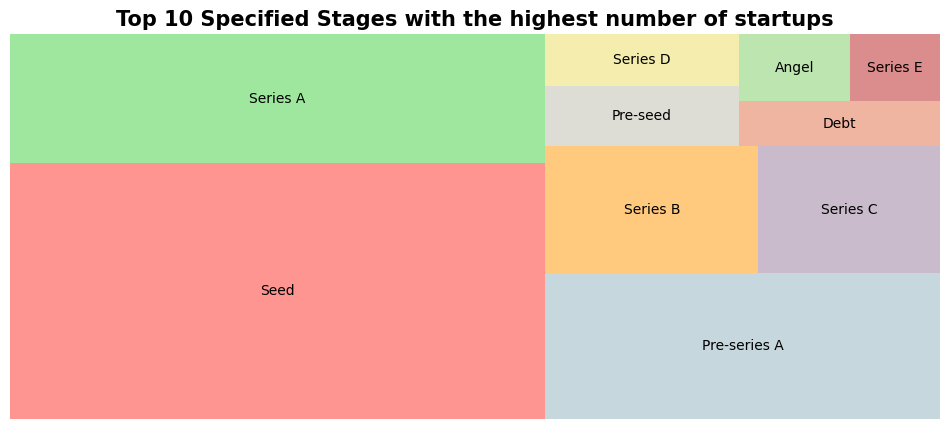

In [118]:
# Assigning the Stage and Number columns to separate variables 
stages = Top_10_stages['Stage'] 
numbers = Top_10_stages['Number']

# Creating a color list for the tree map 
colors = ['#ff6961', '#77dd77', '#aec6cf', '#ffb347', '#b39eb5', '#cfcfc4', '#f0e68c', '#e9967a', '#a0db8e', '#cd5c5c']

# Plotting the tree map 
plt.figure(figsize=(12,5))
squarify.plot(sizes=numbers, label=stages, color=colors, alpha=.7) 
plt.title('Top 10 Specified Stages with the highest number of startups',fontsize=15, fontweight='bold')
plt.axis('off') 
plt.show();

### Insights

From the map, it can be observed that, the seed stage has the most number of startups (About 680 in number). This corresponds to well-known observation that, most startups barely leave the seed funding stage

### 5. The city with the highest number of startups and the total investment receieved by the city 

In [119]:
data['HeadQuarter'] = data.HeadQuarter.apply(lambda x:str(x).replace('Mumbai, Maharashtra, India','Mumbai'))
hq_counts = data['HeadQuarter'].value_counts()
hq_counts

Bangalore                                         878
Mumbai                                            474
Gurugram                                          239
New Delhi                                         181
Bangalore, Karnataka, India                       101
                                                 ... 
West Bengal                                         1
Nagpur                                              1
San Francisco Bay Area, West Coast, Western US      1
Powai                                               1
Lucknow, Uttar Pradesh, India                       1
Name: HeadQuarter, Length: 171, dtype: int64

In [120]:
# Filter the dataframe to include only the rows where the "HeadQuarter" column is "Bangalore"
bangalore = data[data["HeadQuarter"] == "Bangalore"]
bangalore

# Sum the values in the "Amount($)" column
total_investment = bangalore["Amount($)"].sum().round()
print('The total investment in Bangalore is: $',"{:,}".format(total_investment))

The total investment in Bangalore is: $ 24,511,475,206.0


### Insights
Bangalore has the highest number of startups (878) with a total investment amount of about 24.5 billion dollars.<br>
This implies that on an average, startups in Bangalore are likely to receive investment in the regions of 28 million dollars. <br> This makes Bangalore a good location for emerging startups

### 6. Top 5 Cities with the Highest Investment 

In [121]:
Invest_City = data.groupby('HeadQuarter')['Amount($)'].sum().round().sort_values(ascending=False).head()

Invest_City = pd.DataFrame({'City':Invest_City.index, 'Invest_Amount': Invest_City.values})
pd.set_option('display.float_format', lambda x: f'{x:.2f}')

Invest_City

,City,Invest_Amount
0,Mumbai,231569372742.00
1,Bangalore,24511475206.00
2,Gurugram,5592175000.00
3,California,3078300000.00
4,New Delhi,2958752000.00


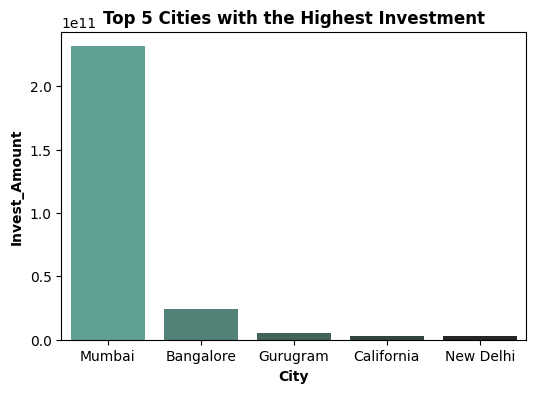

In [122]:
plt.figure(figsize=(6,4))
plt.title('Top 5 Cities with the Highest Investment',fontweight ='bold')
plt.xlabel('City',fontweight ='bold')
plt.ylabel('Amount ($)',fontweight ='bold')
sns.barplot(data=Invest_City, y='Invest_Amount',x='City',palette="dark:#5A9_r");

### Mumbai VS Bangalore 

Despite the large number of startups in Bangalore compared to the other locations,<br> it is not the city with the highest investment funding.We compared Mumbai to Bangalore to derive insights.

In [123]:
# The count of startups in both cities
hq_counts = data['HeadQuarter'].value_counts().head(2)
hq_counts = pd.DataFrame({'City':hq_counts.index, 'Number_startups':hq_counts.values})

hq_counts

,City,Number_startups
0,Bangalore,878
1,Mumbai,474


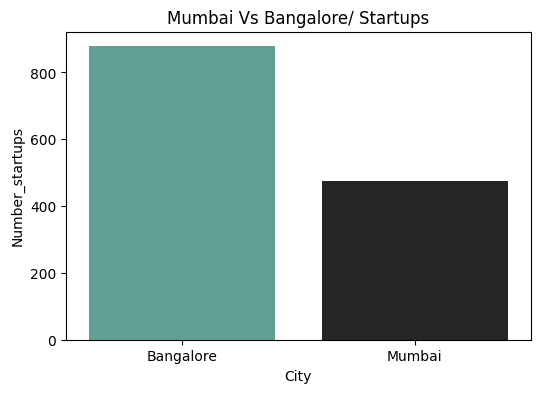

In [124]:
plt.figure(figsize=(6,4))
plt.title('Mumbai Vs Bangalore/ Startups')
plt.xlabel('City')
plt.ylabel('Number of Startups')
sns.barplot(data=hq_counts, y='Number_startups',x='City',palette="dark:#5A9_r");

In [125]:
#The investment funding in both cities

Invest_City_new = Invest_City.head(2)
Invest_City_new

,City,Invest_Amount
0,Mumbai,231569372742.00
1,Bangalore,24511475206.00


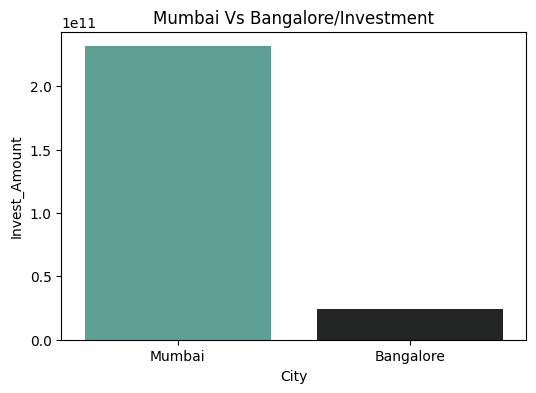

In [126]:
plt.figure(figsize=(6,4))
plt.title('Mumbai Vs Bangalore/Investment')
plt.xlabel('City')
plt.ylabel('Invest_Amount ($)')
sns.barplot(data=Invest_City_new, y='Invest_Amount',x='City',palette="dark:#5A9_r");

In [127]:
#Mumbai vs Bangalore

MumBan = pd.merge(hq_counts,Invest_City_new, on = 'City' )
MumBan

,City,Number_startups,Invest_Amount
0,Bangalore,878,24511475206.00
1,Mumbai,474,231569372742.00


### Insights

As shown on the graph:
* The number of startup companies is Bangalore is the highest (about 878). 
* However Mumbai, which has almost twice as less startups than Bangalore, has the highest funding for startups.
* This means that startups in Mumbai have access to more funds than those in other locations.
* Thus, on an average, startups in Mumbai receive about 488 milion Dollars.
* Based on this, it is safe to say that, Mumbai is the preferably the best location for startups in India.


### 7. Average investment amount for a seed stage investment over the period in India

In [128]:
data_seed = data[data['Stage']=='Seed']
data_seed = data_seed.groupby('Year')['Amount($)'].mean().round()
data_seed = pd.DataFrame({'Year': data_seed.index , 'Amount': data_seed.values })
data_seed

,Year,Amount
0,2018,649807.00
1,2020,1221275.00
2,2021,2604492.00


### Insights
From the graph, we can see that:
* There is no data available for startups who are in the seed funding stage for 2019.
* The year 2021 has more startups in the seed funding stage, hence, it has highest average investment within the period of observation.

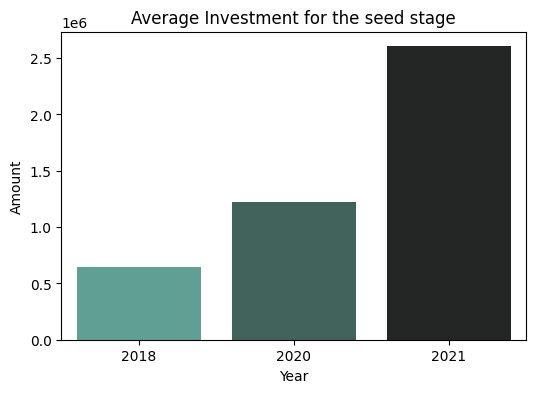

In [129]:
plt.figure(figsize=(6,4))
plt.title('Average Investment for the seed stage')
plt.xlabel('Year')
plt.ylabel('Amount ($)')
sns.barplot(data=data_seed, y='Amount',x='Year',palette="dark:#5A9_r");


### 8. Top 5 Sectors in Mumbai per Investment Funding Received

In [130]:
# Filter and Group data ude only Mumbai-based companies
mumbai_data = data[data['HeadQuarter'] == 'Mumbai'].groupby('Sector')['Amount($)'].sum()

# Sort the grouped data in descending order
mumbai_data  = mumbai_data.sort_values(ascending=False).head()
mumbai_df= pd.DataFrame({'Sector':mumbai_data.index, 'Amount($)':mumbai_data.values})

mumbai_df

,Sector,Amount($)
0,FinTech Company,150321799700.00
1,Retail,70023000000.00
2,Multinational conglomerate company,2200000000.00
3,E-commerce,1027749000.00
4,Education,875000000.00


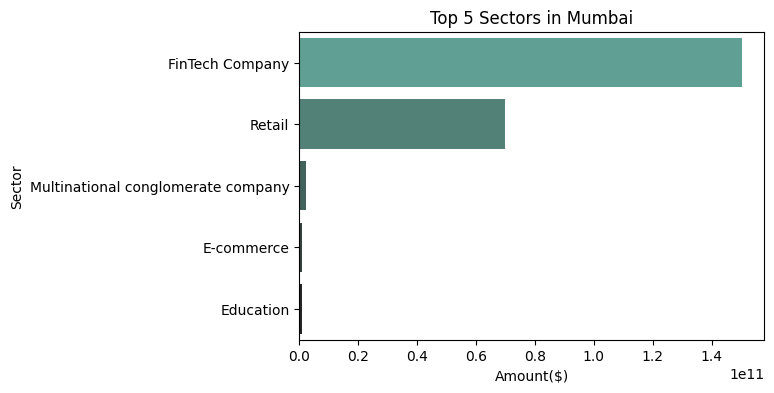

In [131]:
plt.figure(figsize=(6,4))
plt.title('Top 5 Sectors in Mumbai')
plt.xlabel('Sector')
plt.ylabel('Amount ($)')
sns.barplot(data=mumbai_df, y='Sector',x='Amount($)',palette="dark:#5A9_r");

### 9.Top 5 sectors in Bangalore per Number of Startups

In [132]:
bangalore_data = data[data["HeadQuarter"] == "Bangalore"].groupby('Sector')['Company/Brand'].count()
bangalore_data = bangalore_data.sort_values(ascending =False).head()
bangalore_data

Sector
FinTech Company       92
EdTech Company        86
Financial Services    28
SaaS                  28
HealthTech Company    24
Name: Company/Brand, dtype: int64

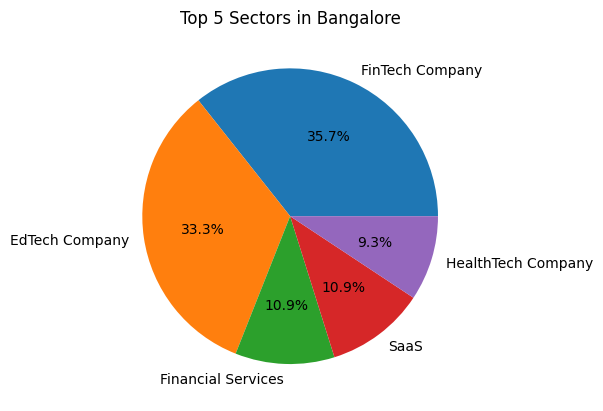

In [133]:
# Create a pie chart to represent the top 5 sectors
plt.pie(bangalore_data.values, labels=bangalore_data.index, autopct="%1.1f%%")
plt.title("Top 5 Sectors in Bangalore")
plt.show()

### Hypothesis Testing

In [134]:
data.groupby('Sector')['Amount($)'].sum().sort_values(ascending =False).head(10)

Sector
FinTech Company                      154751432909.60
Retail                                70542380000.00
EdTech Company                         5881552278.17
Tech Company                           3423983900.00
E-commerce                             2879052000.00
Multinational conglomerate company     2200000000.00
Automotive                             2111941000.00
Financial Services                     1800826500.00
Hospitality                            1622903000.00
Insurance                              1097650000.00
Name: Amount($), dtype: float64

In [135]:
Total_funds = data['Amount($)'].sum()

In [136]:
Tech_funds = data[data['Sector'].str.contains('Tech')]['Amount($)'].sum()

In [137]:
Tech_funds/Total_funds

0.600324234459906

From above, it is more likely for tech companies to access more funding. Thus we fail to reject the null hypothesis

### Conclusion and Recommendation

* The indian startup ecosystem is on the rise.
* The prevalent startups are tech-inclined ventures
* Most startups that receive funding are located in the regions of Mumbai.
* Bangalore has the highest number of startups. Perhaps, there is ease in setting up in Bangalore.
* There is a higher likelihood of a tech inclined venture to access funds. 